# Convolutional Neural Networkss
> Maintainer: Huong Nguyen (huong.nguyen@fansipan.io)

1. Handwritten digits recognition with Keras CNN
2. Understanding of filters, feature maps, and pooling
3. Custom loss and metrics
4. Multi-outputs
5. Custom layers

## 1. Handwritten digits recognition with Keras CNN
> Reference: [Handwritten Digit Recognition using Convolutional Neural Networks in Python with Keras](https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/)

In [0]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

# load dataset
(train_input, train_label), (test_input, test_label) = mnist.load_data()

# reshape to be [samples][width][height][channels]
train_input = train_input.reshape((train_input.shape[0], 28, 28, 1)).astype('float32')
test_input = test_input.reshape((test_input.shape[0], 28, 28, 1)).astype('float32')

# normalize inputs from 0-255 to 0-1
train_input = train_input / 255
test_input = test_input / 255

# one hot encode outputs
train_label = np_utils.to_categorical(train_label)
test_label = np_utils.to_categorical(test_label)
num_classes = test_label.shape[1]

# build model
model = Sequential()
model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(train_input, train_label, validation_data=(test_input, test_label), epochs=10, batch_size=200, verbose=0)

# Final evaluation of the model
scores = model.evaluate(test_input, test_label, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))



Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 15)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)             

## 2. Understanding of filters, feature maps, and pooling
> Reference: [CS231n Convolutional Neural Networks for Visual Recognition](http://cs231n.github.io/convolutional-networks/#conv)

CNNs are **neural networks** which have neurons and learnable parameters (weight and bias) and its functions for performing training process (propagation and backpropagation). The main difference is that CNNs always **assump the inputs are images** so that it can apply convoluional teniques to reduce learnable parameters in the network.

A simple CNN is a sequence of layers. Each layer has its function to transform input (3D volume) to another one. There are 2 main type of layer to build a full CNN inluding **Convolutional layer, pooling layer, and full-connected layer (a ANN)**.

> [INPUT - CONV - POOL - FC].







## 3. Custom loss function, and metrics

Instead of using built-in loss functions and metrics, we can define our own ones

In [0]:
from keras import losses
from keras import metrics

losses.mse??
# metrics.categorical_accuracy??

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.1233 - categorical_accuracy: 0.3669 - val_loss: 0.0657 - val_categorical_accuracy: 0.6570
Epoch 2/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.0493 - categorical_accuracy: 0.7424 - val_loss: 0.0290 - val_categorical_accuracy: 0.8502
Epoch 3/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.0328 - categorical_accuracy: 0.8287 - val_loss: 0.0266 - val_categorical_accuracy: 0.8626
Epoch 4/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.0301 - categorical_accuracy: 0.8433 - val_loss: 0.0254 - val_categorical_accuracy: 0.8676
Epoch 5/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.0205 - categorical_accuracy: 0.8917 - val_loss: 0.0074 - val_categorical_accuracy: 0.9600
Epoch 6/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.0101 - categor

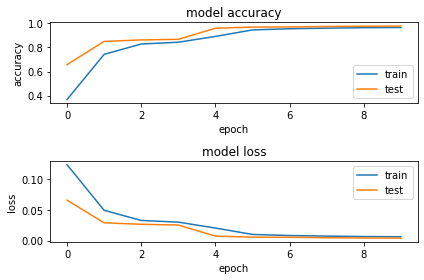

In [0]:
from keras.datasets import mnist
from keras.utils import to_categorical

from keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPool2D
from keras.models import Model

from keras import backend as K

import matplotlib.pyplot as plt
 
# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape inputs for CNNs
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32')
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32')

# convert output
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# define layers
inputs = Input(shape=(28, 28, 1))
conv1 = Conv2D(filters=30, kernel_size=(5,5), activation='relu')(inputs)
pool1 = MaxPool2D()(conv1)
conv2 = Conv2D(filters=15, kernel_size=(3, 3), activation='relu')(pool1)
pool2 = MaxPool2D()(conv2)
dropout = Dropout(rate=0.2)(pool2)
flatten = Flatten()(dropout)
outputs = Dense(units=len(class_names), activation='softmax')(flatten)

# custom loss function
def mean_squared_error(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)

# custom metrics
def categorical_accuracy(y_true, y_pred):
    return K.cast(K.equal(K.argmax(y_true, axis=-1),
                          K.argmax(y_pred, axis=-1)),
                  K.floatx())

# create model
model = Model(inputs, outputs)
model.compile(optimizer='adam', loss=mean_squared_error, metrics=[categorical_accuracy])
history = model.fit(x_train, y_train, epochs=10, batch_size=500, validation_data=(x_test, y_test))

# plot training history
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

plt.show()


## 4. Multi-outputs

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step





Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             (None, 28, 28)       0                                            
__________________________________________________________________________________________________
flatten (Flatten)               (None, 784)          0           inputs[0][0]                     
__________________________________________________________________________________________________
relu (Dense)                    (None, 32)           25120       flatten[0][0]                    
__________________________________________________________________________________________________
digit (Dense)                   (None, 10)           330         relu[0][0]                       
______________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=[<tf.Tenso...)`


(60000,)
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/20





60000/60000 [==============================] - 5s 83us/step - loss: 90.6924 - digit_loss: 2.4210 - pixel_loss: 88.2715 - digit_binary_accuracy: 0.8998 - pixel_mean_absolute_error: 88.2715 - val_loss: 72.6763 - val_digit_loss: 1.8389 - val_pixel_loss: 70.8374 - val_digit_binary_accuracy: 0.9012 - val_pixel_mean_absolute_error: 70.8374
Epoch 2/20
60000/60000 [==============================] - 0s 8us/step - loss: 42.8358 - digit_loss: 1.5114 - pixel_loss: 41.3244 - digit_binary_accuracy: 0.9071 - pixel_mean_absolute_error: 41.3244 - val_loss: 6.6593 - val_digit_loss: 1.3480 - val_pixel_loss: 5.3113 - val_digit_binary_accuracy: 0.9128 - val_pixel_mean_absolute_error: 5.3113
Epoch 3/20
60000/60000 [==============================] - 1s 9us/step - loss: 2.5267 - digit_loss: 1.1408 - pixel_loss: 1.3859 - digit_binary_accurac

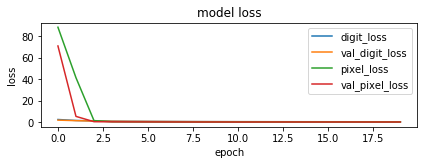

(Input Digit , Input Pixel) -> (Predicted Digit , Predicted Pixel) 
(7, 72.3686274509804) -> (7, 72.31289672851562)
(2, 113.13725490196077) -> (2, 113.15975189208984)
(1, 38.70980392156863) -> (1, 38.68938446044922)
(0, 145.1529411764706) -> (0, 145.04869079589844)
(4, 75.43921568627452) -> (4, 75.41152954101562)
(1, 54.33333333333333) -> (1, 54.30049514770508)
(4, 83.07450980392157) -> (4, 82.98036193847656)
(9, 82.59607843137255) -> (9, 82.5544204711914)
(5, 120.52549019607844) -> (6, 120.40264892578125)
(9, 122.94117647058823) -> (9, 122.86383056640625)


In [0]:
from keras.datasets import mnist
from keras.layers import Flatten, Dense, Input
from keras.models import Model
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# define network with multi-outputs
inputs = Input(shape=(28, 28), name="inputs")
hidden = Flatten(name='flatten')(inputs)
hidden = Dense(units=32, activation='relu', name="relu")(hidden)
output1 = Dense(units=10, activation='softmax', name="digit")(hidden)
output2 = Dense(units=1, name="pixel")(hidden) # linear regression 

# create model
model = Model(input=inputs, output=[output1, output2])
model.compile(optimizer=Adam(lr=0.001),
              loss=['categorical_crossentropy', 'mae'],
              metrics={'digit': 'binary_accuracy', 'pixel': 'mae'})
model.summary()

# pre-process datatset
x_train, x_test = x_train/255, x_test/255

y_train1 = to_categorical(y_train, 10) # (60000, 10) 60000 elemenents, each element is a vector
y_train2 = np.array([np.sum(x) for x in x_train]) # (60000, ) 60000 elemenents, each element is a scalar
print(y_train2.shape)

y_test1 = to_categorical(y_test, 10)
y_test2 = np.array([np.sum(x) for x in x_test])

# train
history = model.fit(x=x_train, y=[y_train1, y_train2], batch_size=1000, epochs=20, verbose=1,
                    validation_data=(x_test, [y_test1, y_test2]))

# plot training history
fig = plt.figure()
plt.subplot(2,1,2)
plt.plot(history.history['digit_loss'])
plt.plot(history.history['val_digit_loss'])
plt.plot(history.history['pixel_loss'])
plt.plot(history.history['val_pixel_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['digit_loss', 'val_digit_loss', 'pixel_loss', 'val_pixel_loss'], loc='upper right')

plt.tight_layout()

plt.show()

# use multi-ouputs
p = model.predict(x_test[:10])

p_digits = p[0]
p_pixels = p[1]

print('(Input Digit , Input Pixel) -> (Predicted Digit , Predicted Pixel) ')
for i in range(10):
	print("({}, {}) -> ({}, {})".format(np.argmax(y_test1[i]), np.sum(x_test[i]), np.argmax(p_digits[i]), p_pixels[i, 0]))

## 5. Custom layers

In [0]:
from keras.datasets import mnist
from keras.layers import Flatten, Dense, Input
from keras.models import Model
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# TODO: define my own Keras layer
class MyDigitConverterLayer(Dense):
    def build(self, input_shape):
        super(MyDigitConverterLayer, self).build(input_shape)

    def call(self, inputs):
        return super(MyDigitConverterLayer, self).call(inputs)

    def compute_output_shape(self, input_shape):
        return super(MyDigitConverterLayer, self).compute_output_shape(input_shape)

# define network
inputs = Input(shape=(28, 28), name="inputs")
hidden = Flatten(name='flatten')(inputs)
outputs = MyDigitConverterLayer(units=10, name="digit")(hidden)

# create model
model = Model(inputs, outputs)
model.compile(optimizer=SGD(lr=0.001),
              loss='mae',
              metrics=['mae'])
model.summary()

# pre-process datatset
x_train, x_test = x_train/255, x_test/255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# train
history = model.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1)

# use multi-ouputs
prediction = model.predict(x_test[:10])

print('Input Digit -> Predicted Digit')
for i in range(10):
	print("{} --> {}".format(y_test[i], prediction[i]))

Model: "model_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 28, 28)            0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
digit (MyDigitConverterLayer (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.4053 - mean_absolute_error: 0.4053
Epoch 2/20
60000/60000 [==============================] - 0s 6us/step - loss: 0.3737 - mean_absolute_error: 0.3737
Epoch 3/20
60000/60000 [==============================] - 0s 5us/step - loss: 0.3551 - mean_absolute_error: 0.3551
Epoch 4/20
60000/60000 [================